In [1]:
%display latex

In [2]:
viewer3D = 'jmol' # must be 'jmol', 'tachyon', 'threejs' (experimental) or None (default)

In [3]:
var('r T', domain='real')

(r, T)

In [4]:
W0(x) = lambert_w(x/RDF(e)) + 1 

In [5]:
def Xmin(T):
    return sqrt(max(0, RDF(T^2-1)))

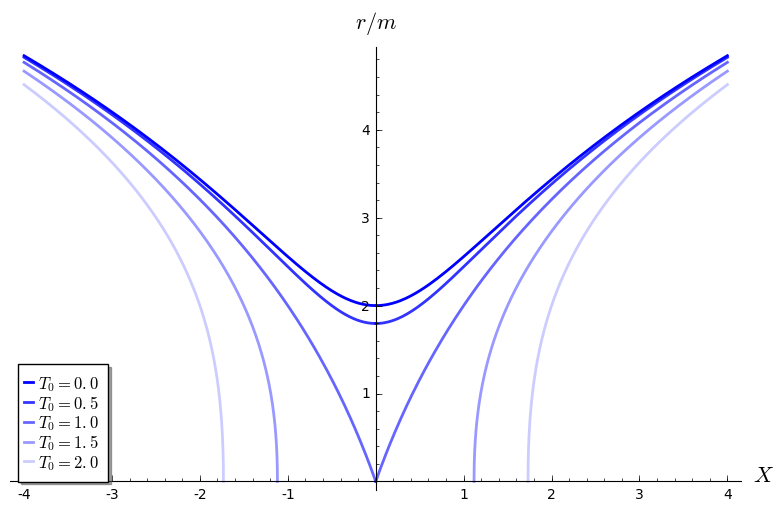

In [6]:
T0_list = [0., 0.5, 1., 1.5, 2.0001]
g = Graphics()
for T0 in T0_list:
    alp = 0.2 + 0.4*(2. - T0)
    g += plot(2*W0(x^2-T0^2), (x,-4,-Xmin(T0)), thickness=2, color='blue', alpha=alp,
              legend_label="$T_0={:02.1f}$".format(float(T0))) + \
         plot(2*W0(x^2-T0^2), (x, Xmin(T0), 4), thickness=2, color='blue', alpha=alp)
show(g, aspect_ratio=1, axes_labels=[r'$X$', r'$r/m$'])

In [7]:
g.save("max_SigmaT0_r_X.pdf", aspect_ratio=1, axes_labels=[r'$X$', r'$r/m$'])

In [8]:
sing = plot(sqrt(1+x^2), (x,-3,3), color='brown', thickness=4, linestyle='--') \
       + text(r"$r=0$", (2.5, 3), rotation=45, fontsize=16, color='brown') \
       + plot(-sqrt(1+x^2), (x,-3,3), color='brown', thickness=4, linestyle='--') \
       + text(r"$r'=0$", (2.5, -3), rotation=-45, fontsize=16, color='brown')
bifhor = line([(-3,-3), (3,3)], color='black', thickness=3) + \
         line([(-3,3), (3,-3)], color='black', thickness=3) + \
         text(r'$\mathscr{H}$', (3, 2.7), fontsize=20, color='black')

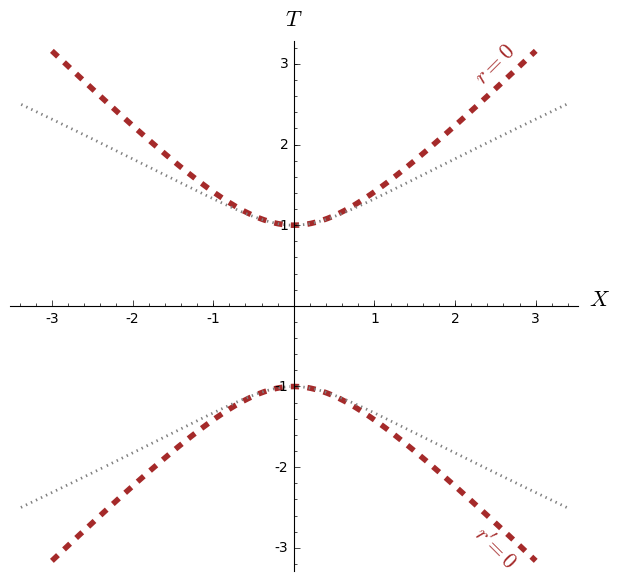

In [9]:
graph = sing
Xemb(T) = abs(T)*sqrt(2*ln(abs(T)))
graph += parametric_plot([Xemb(T), T], (T, 1.001, 2.5), color='grey', thickness=2, linestyle=':') \
         + parametric_plot([-Xemb(T), T], (T, 1.001, 2.5), color='grey', thickness=2, linestyle=':') \
         + parametric_plot([Xemb(T), T], (T, -2.5, - 1.001), color='grey', thickness=2, linestyle=':') \
         + parametric_plot([-Xemb(T), T], (T, -2.5, - 1.001), color='grey', thickness=2, linestyle=':')
show(graph, aspect_ratio=1, axes_labels=[r'$X$', r'$T$'])

In [10]:
def Xmin_emb(T):
    if abs(T) > 1:
        return Xemb(T)
    return 0

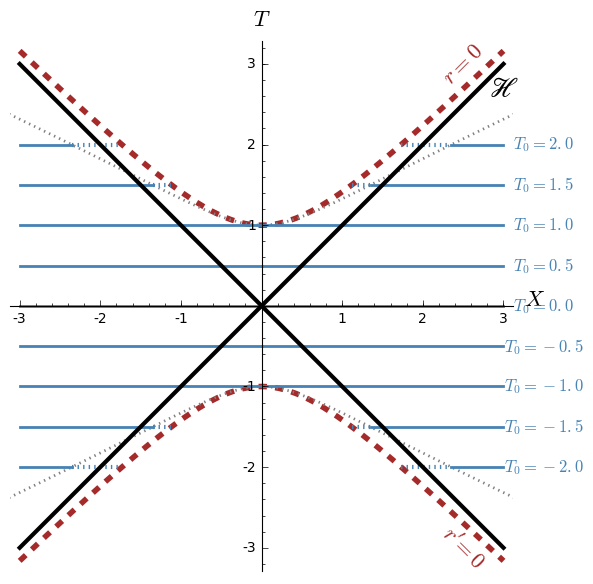

In [11]:
colorS = 'steelblue'
colorS3 = 'lightsteelblue'
#colorS = 'lightseagreen'
#colorS = 'wheat'
T0_list = [-2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5, 2.0001]
for T0 in T0_list:
    graph += line([(-3, T0), (-Xmin_emb(T0), T0)], color=colorS, thickness=2) \
             + line([(-Xmin_emb(T0), T0), (-Xmin(T0), T0)], color=colorS, thickness=3, linestyle=':') \
             + line([(Xmin(T0), T0), (Xmin_emb(T0), T0)], color=colorS, thickness=3, linestyle=':') \
             + line([(Xmin_emb(T0), T0), (3, T0)], color=colorS, thickness=2) \
             + text("$T_0={:02.1f}$".format(float(T0)), (3.5, T0), fontsize=12, color=colorS)
graph += bifhor
show(graph, aspect_ratio=1, xmin=-3, xmax=3, axes_labels=[r'$X$', r'$T$'])

In [12]:
graph.save('max_constant_T_slices.pdf', aspect_ratio=1, 
           xmin=-3, xmax=3, axes_labels=[r'$X$', r'$T$'])

In [13]:
zp(r,T) = sqrt((1-T^2*e^(-r/2))/(r/2-1+T^2*e^(-r/2)))
zp

(r, T) |--> sqrt(2)*sqrt(-(T^2*e^(-1/2*r) - 1)/(2*T^2*e^(-1/2*r) + r - 2))

In [14]:
z = integrate(zp(r,T), r)
z

sqrt(2)*integrate(sqrt(-(T^2*e^(-1/2*r) - 1)/(2*T^2*e^(-1/2*r) + r - 2)), r)

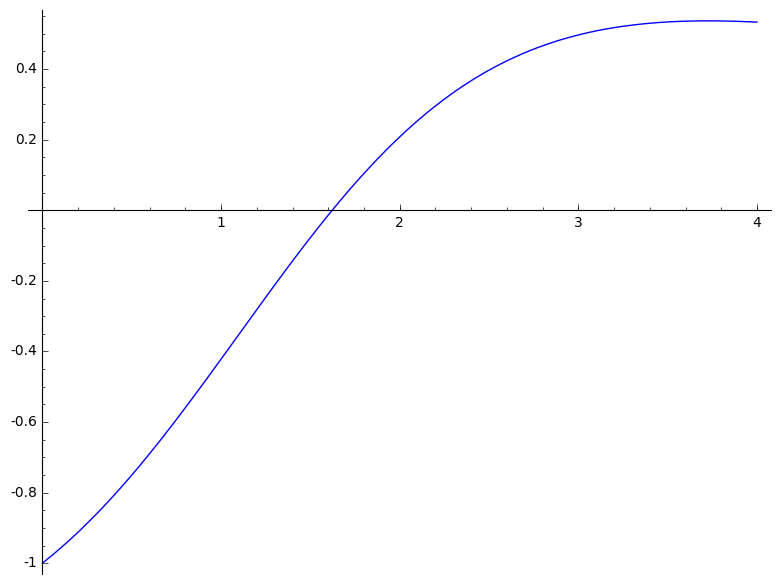

In [15]:
T0=3/2
plot((1-T0^2*e^(-r/2))/(r/2-1+T0^2*e^(-r/2)), (r,0,4))

In [16]:
def rmin(T):
    if T > 1:
        return RDF(4*ln(T))
    return 2*W0(-T^2)

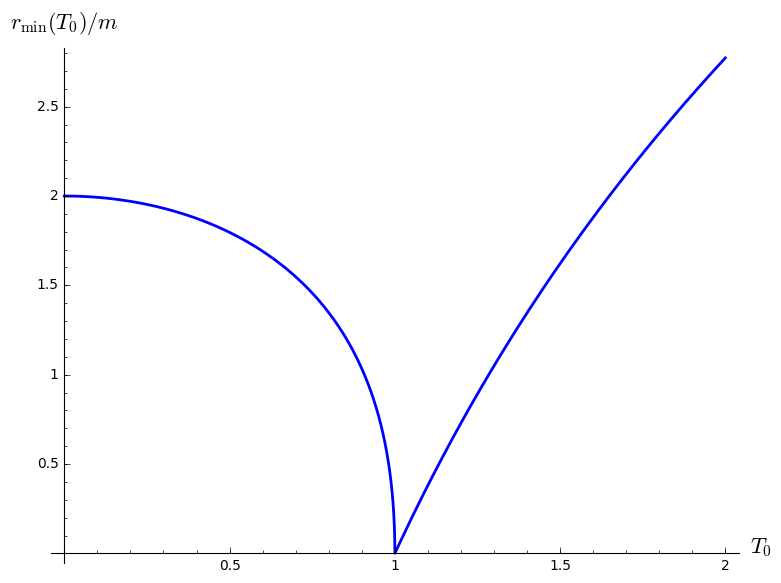

In [17]:
plot(rmin, (T,0,2), axes_labels=[r'$T_0$', r'$r_{\rm min}(T_0)/m$'], thickness=2)

In [18]:
rmin(1/2), rmin(3/2)

(1.796343137811716, 1.6218604324326575)

In [19]:
def zz(r1, T0):
    dzdr = zp(r, T0)
    numint = numerical_integral(dzdr, rmin(T0), r1, algorithm='qags')
    error = numint[1]
    if error > 1e-3: 
        print("Warning: error = {}".format(error))
    if T0 > 1:
        return numint[0] + 1
    return numint[0]

In [20]:
zz(4, 1/2)

4.226847171416433

In [21]:
zz(4, 3/2)

2.4583755881988343

In [22]:
T0_list = [0., 0.5, 1., 1.5, 2.]
#T0_list = [0, 0.98, 0.99, 0.999, 1, 1.1, 1.5, 2]
g = Graphics()
for T0 in T0_list:
    g += plot(lambda r: zz(r, T0), rmin(T0), 20)

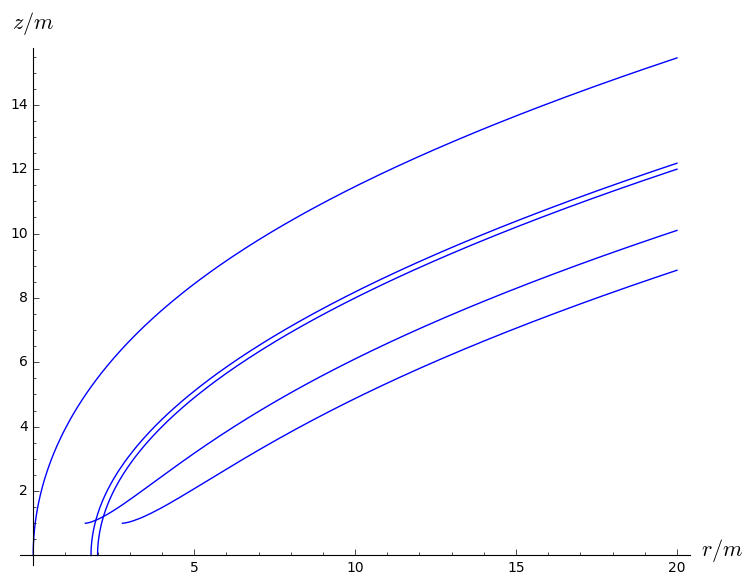

In [23]:
show(g, aspect_ratio=1, xmin=0, xmax=20, axes_labels=[r'$r/m$', r'$z/m$'])

In [24]:
var('ph', latex_name=r'\phi', domain='real')

ph

In [25]:
from sage.manifolds.utilities import set_axes_labels

In [26]:
T0_list = [0., 0.5, 0.9, 1., 1.5, 2.]
for T0 in T0_list:
    g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), 
                            lambda r,ph: zz(r, T0)], 
                           (rmin(T0), 8), (0, 2*pi), color=colorS3)
    g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), 
                            lambda r,ph: -zz(r, T0)], 
                           (rmin(T0), 8), (0, 2*pi), color=colorS3)
    g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
    print("T_0 = {:02.1f}".format(float(T0)))
    show(g, aspect_ratio=1, viewer=viewer3D)
    # show(g, aspect_ratio=1, viewer='tachyon', frame=False, figsize=20)
    g.save_image("max_embedding_T0_{:02.1f}.png".format(float(T0)), aspect_ratio=1, 
                 figsize=10, viewer=viewer3D)

T_0 = 0.0


Graphics3d Object

T_0 = 0.5


Graphics3d Object

T_0 = 0.9


Graphics3d Object

T_0 = 1.0


Graphics3d Object

T_0 = 1.5


Graphics3d Object

T_0 = 2.0


Graphics3d Object